In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Interpretation: Libraries are imported for data manipulation (pandas, NumPy), 
# and visualization (Seaborn, Matplotlib).


In [2]:
# Importing the dataset
file_path = r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD.csv'
df = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print("First five rows of the dataset:")
print(df.head())

# Interpretation: Dataset is loaded into a pandas DataFrame, and the structure of the data is inspected.

First five rows of the dataset:
   Year     Month     Region Home Size  Average Sales Price  \
0  2022  December    Midwest    Double               144300   
1  2022  December    Midwest   Single                 82300   
2  2022  December    Midwest    Total1               104700   
3  2022  December  Northeast    Double               158300   
4  2022  December  Northeast   Single                 75300   

   Number of Households (Thousands)  Median Income - Current Dollars  \
0                             28280                            73070   
1                             28280                            73070   
2                             28280                            73070   
3                             22630                            80360   
4                             22630                            80360   

   Median Income - 2022 Dollars  Mean Income - Current Dollars  \
0                         73070                         102400   
1                       

In [3]:
# Taking care of missing data
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Filling missing numerical values with the mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Dropping rows with missing categorical data
df.dropna(inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

# Interpretation: Numerical missing values are filled with the mean of the column, 
# and rows with missing categorical data are removed to maintain data integrity.


Missing values in each column:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
Purchase Completion                 0
dtype: int64
Missing values after handling:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
Purchase Completion                 0
dtype: int64


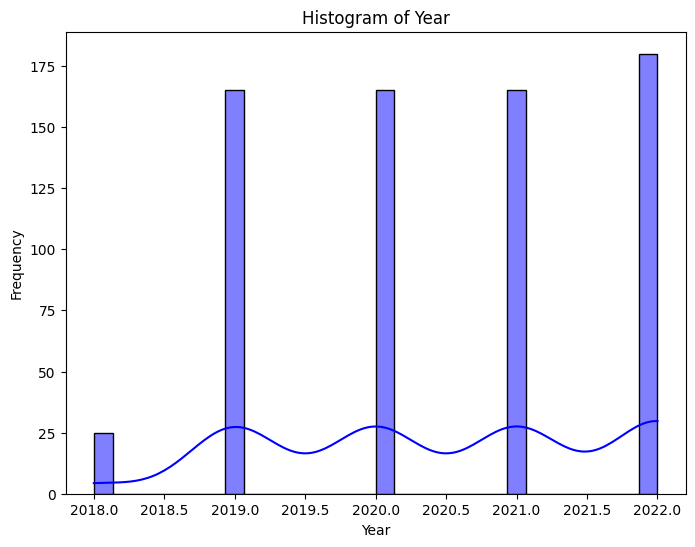

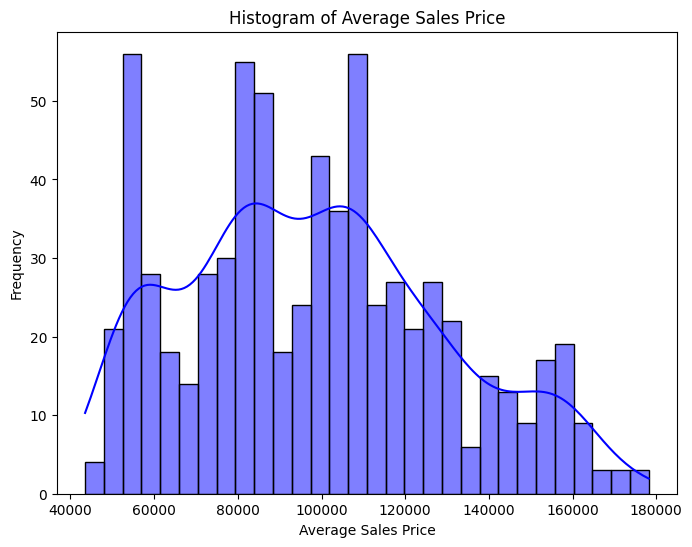

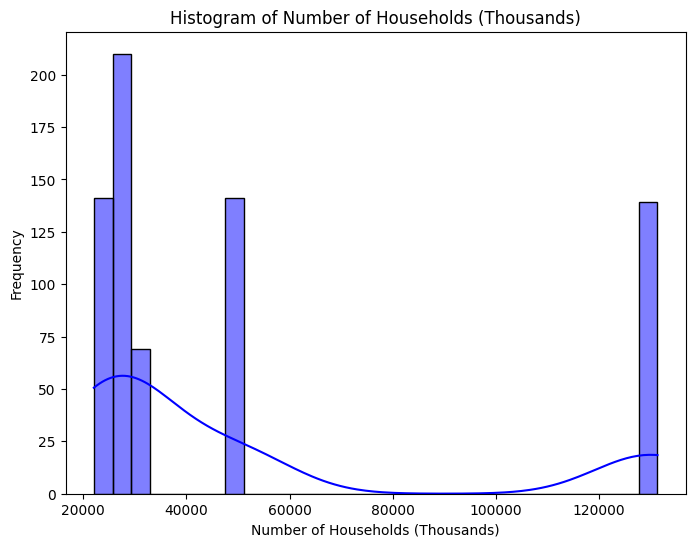

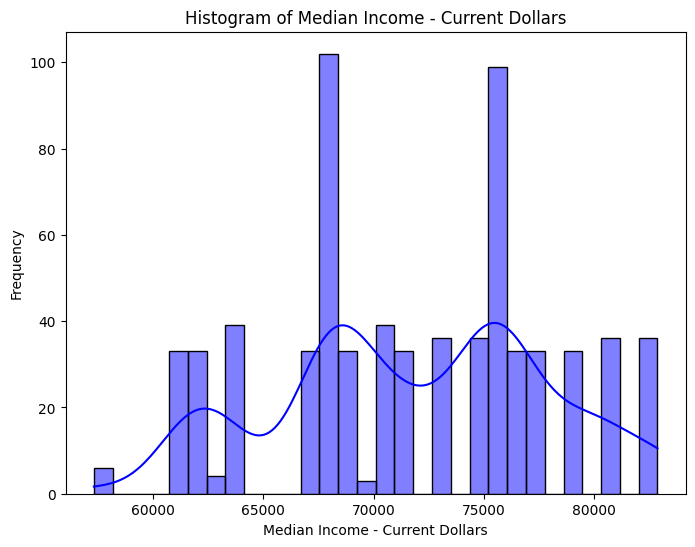

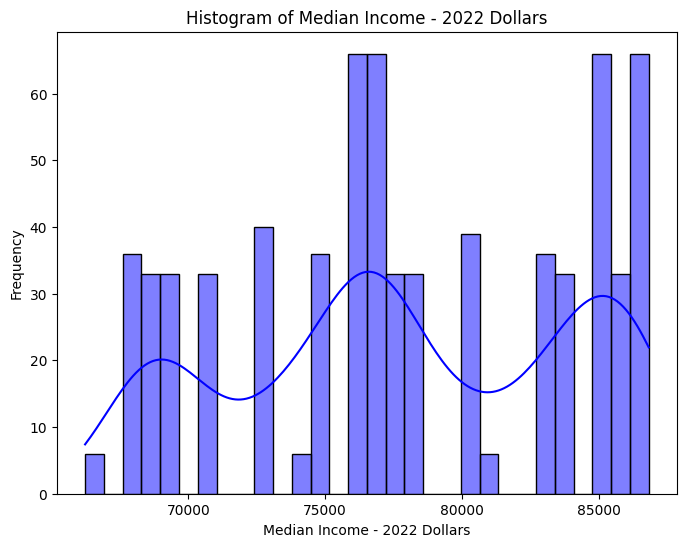

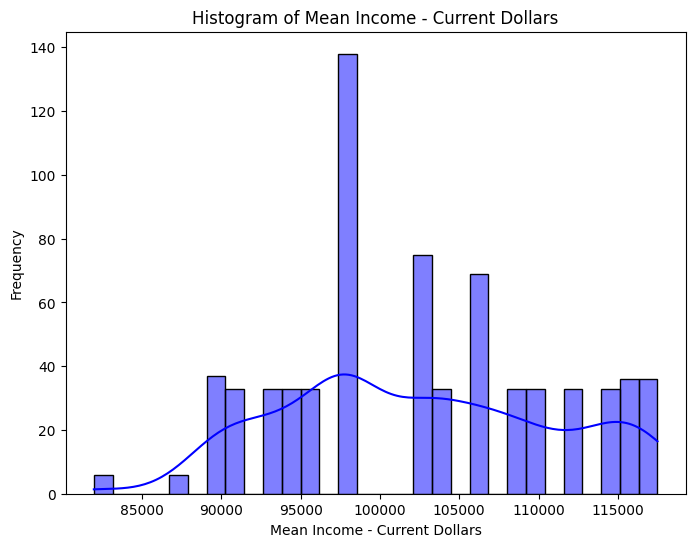

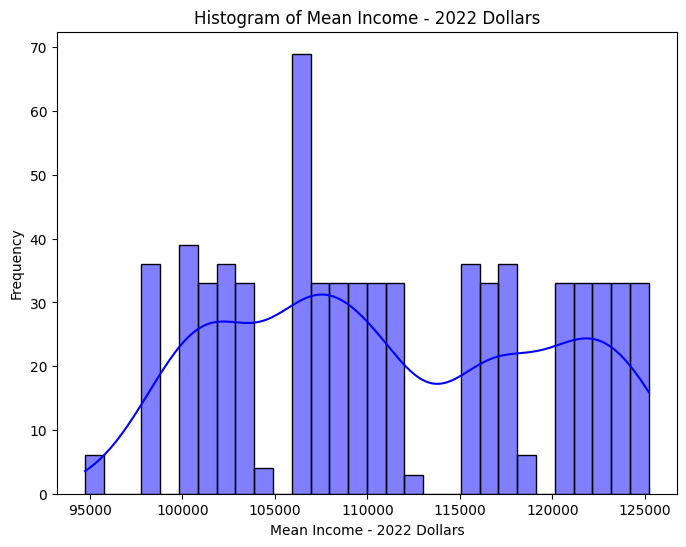

In [5]:
# Distribution of numeric variables using histogram
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Interpretation: Histograms visualize the distribution of numerical variables. 
# KDE curve overlays help identify skewness or normality.

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_53851/265206646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


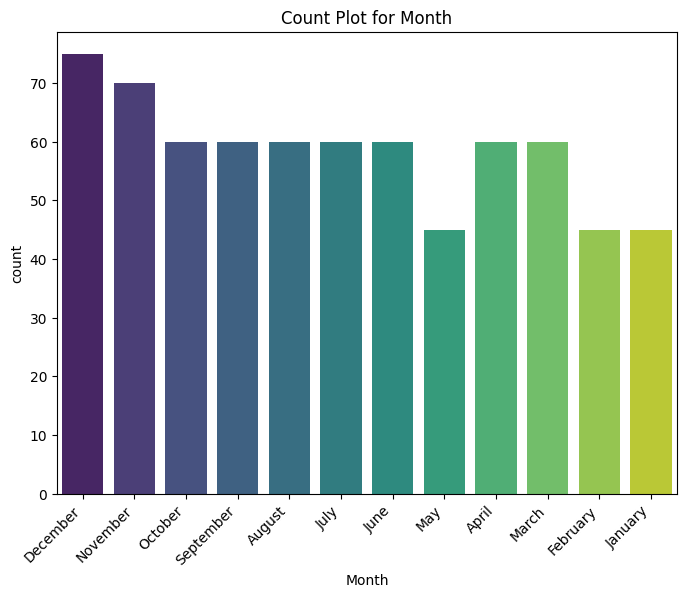

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_53851/265206646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


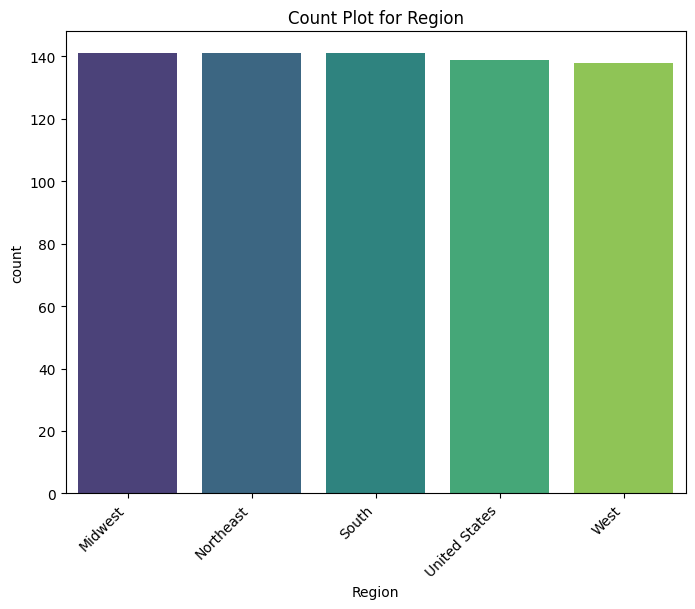

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_53851/265206646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


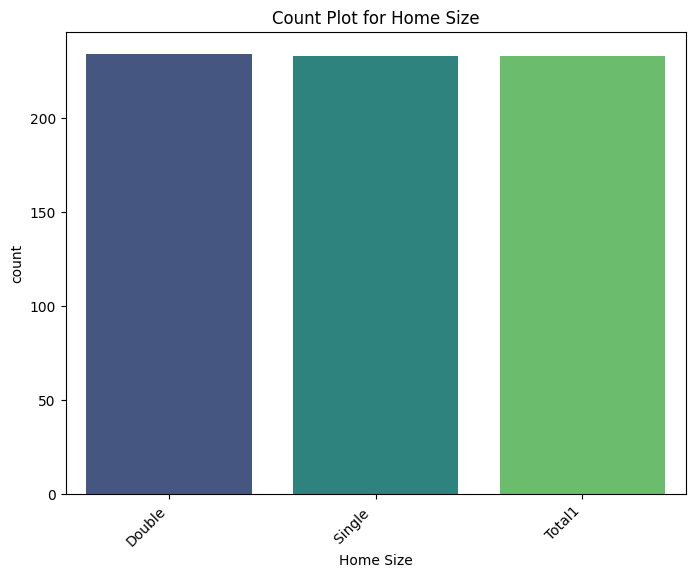

In [6]:
# Distribution of nominal variables using count plot
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Interpretation: Count plots represent the frequency of each category for nominal variables. 
# They are ideal for understanding categorical data distributions.

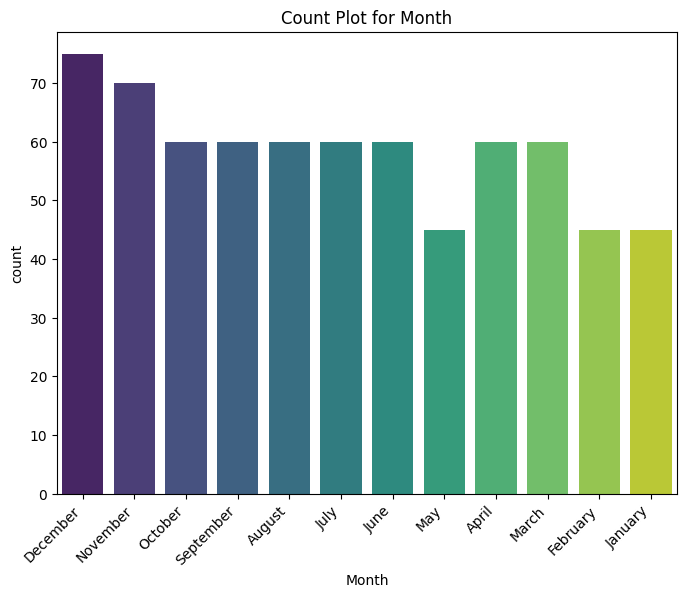

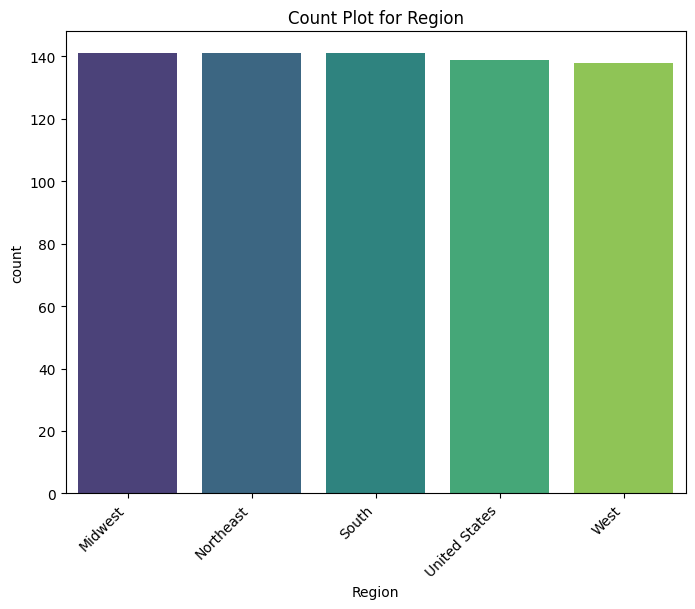

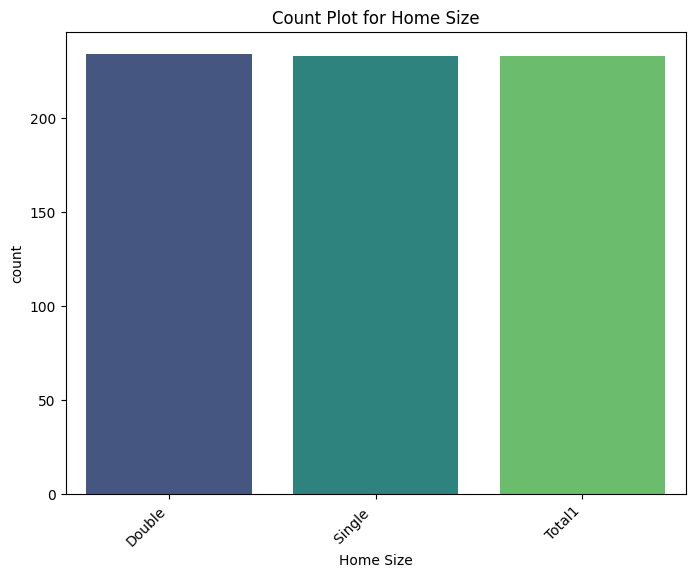

In [7]:
# Distribution of nominal variables using count plot
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', dodge=False, legend=False)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Interpretation: Count plots represent the frequency of each category for nominal variables. 
# The `hue` parameter is set to the same column as `x` to ensure compatibility with future versions.

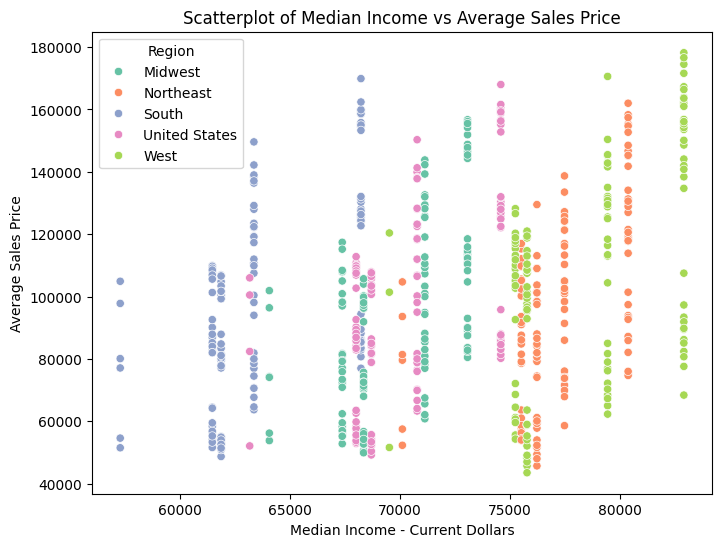

In [8]:
# Comparison of numeric variables using scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Median Income - Current Dollars', y='Average Sales Price', hue='Region', palette='Set2')
plt.title("Scatterplot of Median Income vs Average Sales Price")
plt.xlabel("Median Income - Current Dollars")
plt.ylabel("Average Sales Price")
plt.legend(title='Region')
plt.show()

# Interpretation: Scatterplots help identify relationships between numeric variables 
# (e.g., correlation between income and sales price), with categories differentiated by color.

In [9]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Interpretation: Heatmap visualizes pairwise correlations among numerical variables. 
# Strong positive/negative correlations are easily identifiable.

ValueError: could not convert string to float: 'December'

<Figure size 1000x800 with 0 Axes>

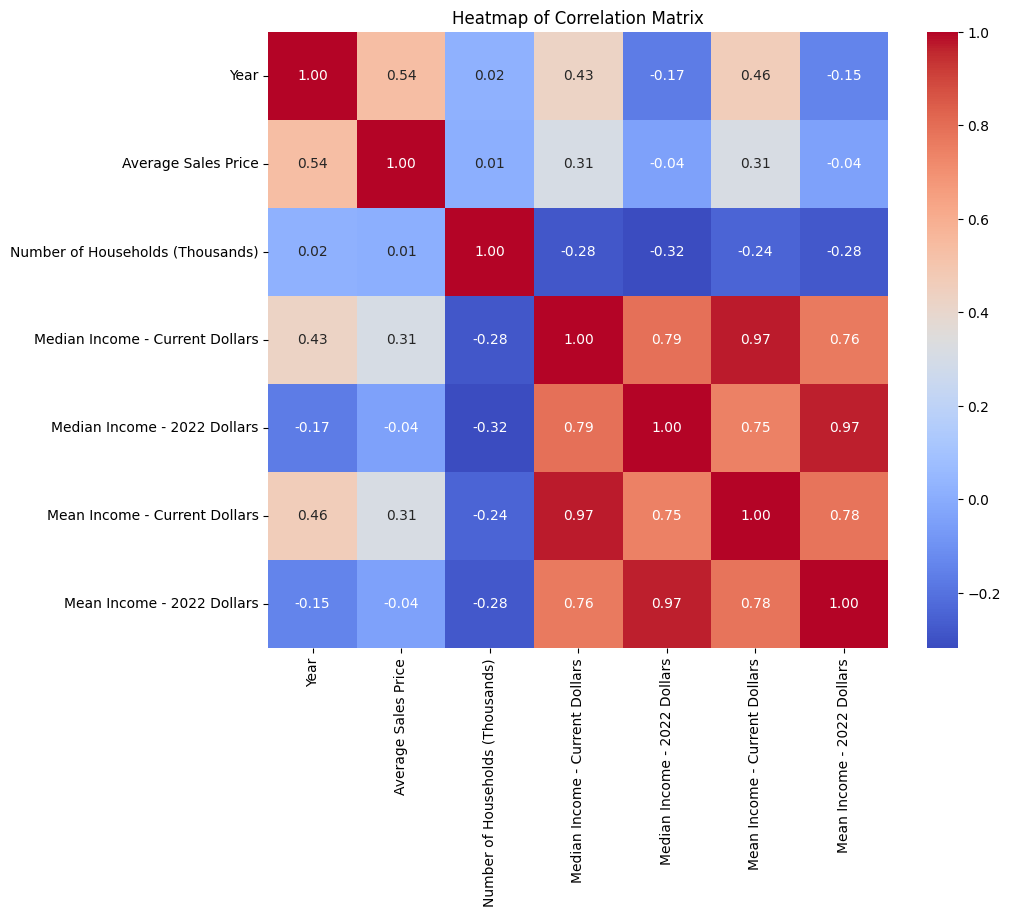

In [10]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Interpretation: Heatmap visualizes pairwise correlations among numerical variables. 
# Strong positive/negative correlations are easily identifiable.


/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_53851/1693940689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Average Sales Price', palette='Set3')


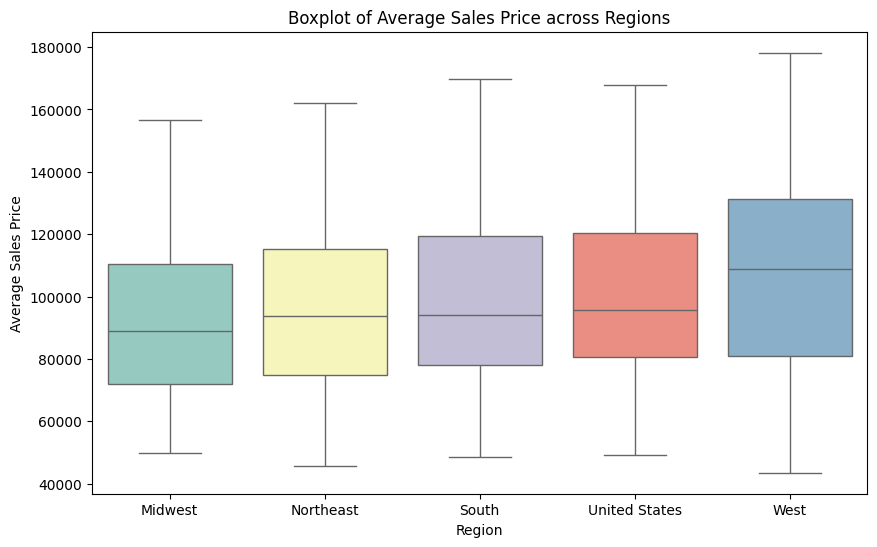

In [11]:
# Boxplot to compare values within groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Average Sales Price', palette='Set3')
plt.title("Boxplot of Average Sales Price across Regions")
plt.xlabel("Region")
plt.ylabel("Average Sales Price")
plt.show()

# Interpretation: Boxplots show data distribution within groups (e.g., regions) and highlight outliers.

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_53851/3078587331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Average Sales Price', palette='Set3', hue=None, legend=False)


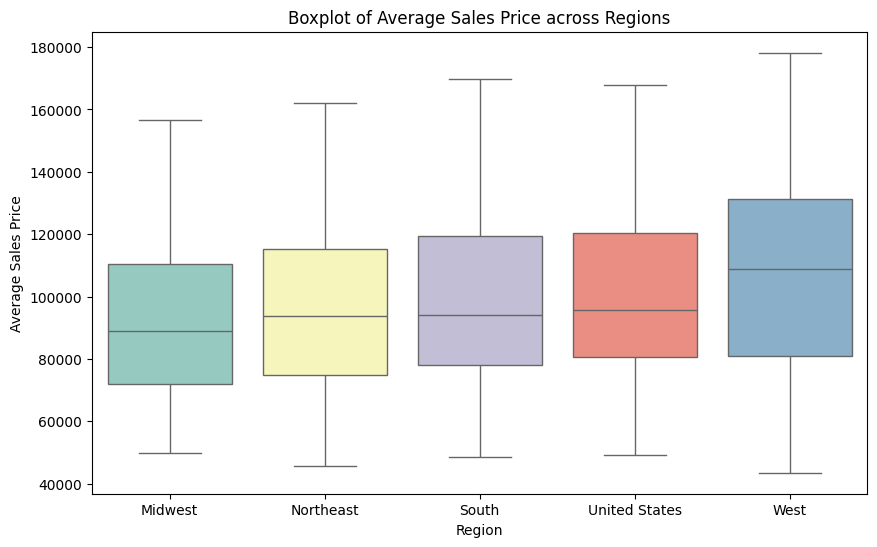

In [12]:
# Boxplot to compare values within groups
plt.figure(figsize=(10, 6))

# Correct usage of palette
sns.boxplot(data=df, x='Region', y='Average Sales Price', palette='Set3', hue=None, legend=False)

plt.title("Boxplot of Average Sales Price across Regions")
plt.xlabel("Region")
plt.ylabel("Average Sales Price")
plt.show()

# Interpretation: Boxplots show data distribution within groups (e.g., regions) and highlight outliers.

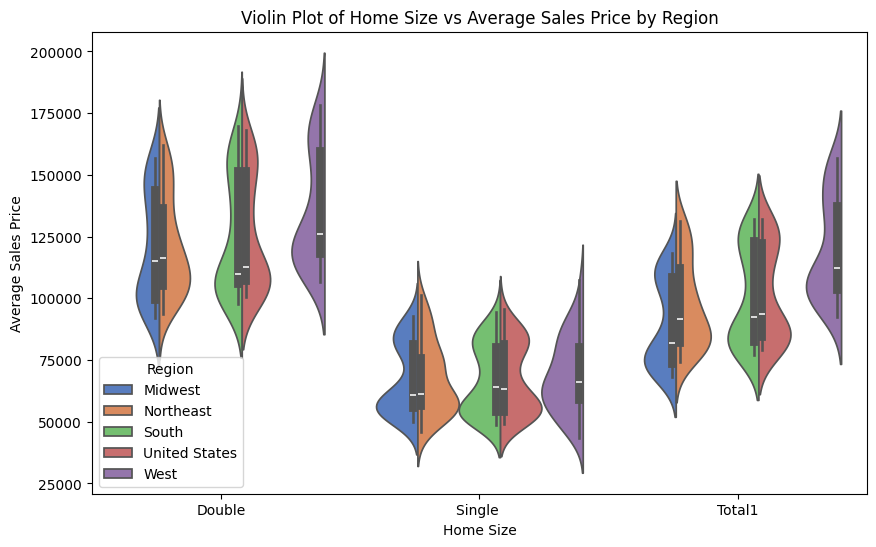

In [13]:
# Additional plot: Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Home Size', y='Average Sales Price', hue='Region', split=True, palette='muted')
plt.title("Violin Plot of Home Size vs Average Sales Price by Region")
plt.xlabel("Home Size")
plt.ylabel("Average Sales Price")
plt.legend(title="Region")
plt.show()

# Interpretation: Violin plots combine boxplots and KDE plots to show the data distribution and variability for each group.

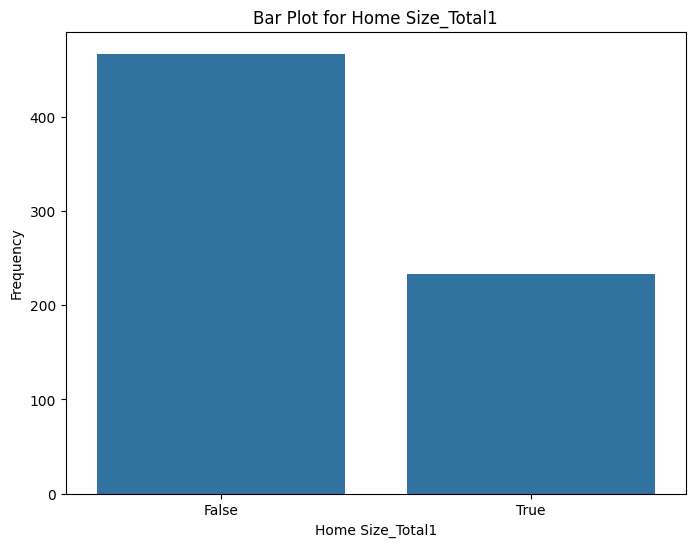

In [14]:
# Apply one-hot encoding
encoded_df = pd.get_dummies(df, columns=cat_cols)
encoded_col = encoded_df.columns[-1]
plt.figure(figsize=(8, 6))
sns.barplot(x=encoded_df[encoded_col].value_counts().index,
            y=encoded_df[encoded_col].value_counts().values)
plt.title(f"Bar Plot for {encoded_col}")
plt.xlabel(encoded_col)
plt.ylabel("Frequency")
plt.show()

#Interpretation : Visualize one of the encoded columns